In [ ]:
import pandas as pd
import sys
import os

: 

In [ ]:
ROOT_DIR = os.path.abspath(os.path.join(os.getcwd(), '..'))
if ROOT_DIR not in sys.path:
    sys.path.append(ROOT_DIR)

In [ ]:
from hyper.german import read_data
from hyper.causal_utils import (
    get_query_output,
)

In [4]:
df = pd.read_csv('../datasets/german.csv')

In [5]:
backdoor={}
for var in df.columns:
    backdoor[var]=['age','sex']
    
scores={}
for col in ['status','credit_history','housing','investment_as_income_percentage']:
    values= list(set(df[col].values))
    scores[col]=[]
    for v in values:
        scores[col].append(get_query_output(df,'count','',[],[],['credit'],[1],[col],[v],['*'],'',{}, backdoor))#,{0:[1,2]}))

[[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]]
[] [] ['age', 'sex'] [0.0, 0.0]
0.37878590875811985 0.105
[] [] ['age', 'sex'] [0.0, 1.0]
0.5462767092523926 0.085
[] [] ['age', 'sex'] [1.0, 0.0]
0.550392685297193 0.205
[] [] ['age', 'sex'] [1.0, 1.0]
0.5158833770553669 0.605
final prob is  0.5111459843104775
[[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]]
[] [] ['age', 'sex'] [0.0, 0.0]
0.5096172298520427 0.105
[] [] ['age', 'sex'] [0.0, 1.0]
0.4664361691623111 0.085
[] [] ['age', 'sex'] [1.0, 0.0]
0.5402802368066768 0.205
[] [] ['age', 'sex'] [1.0, 1.0]
0.6909620379174526 0.605
final prob is  0.6219463649986885
[[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]]
[] [] ['age', 'sex'] [0.0, 0.0]
0.7480550202485684 0.105
[] [] ['age', 'sex'] [0.0, 1.0]
1.0 0.085
[] [] ['age', 'sex'] [1.0, 0.0]
0.8185665848972822 0.205
[] [] ['age', 'sex'] [1.0, 1.0]
0.7462322343610494 0.605
final prob is  0.7828224288184773
[[0.0, 0.0], [0.0, 1.0], [1.0, 0.0], [1.0, 1.0]]
[] [] ['age', 'sex'] [0.0, 0.0]
0

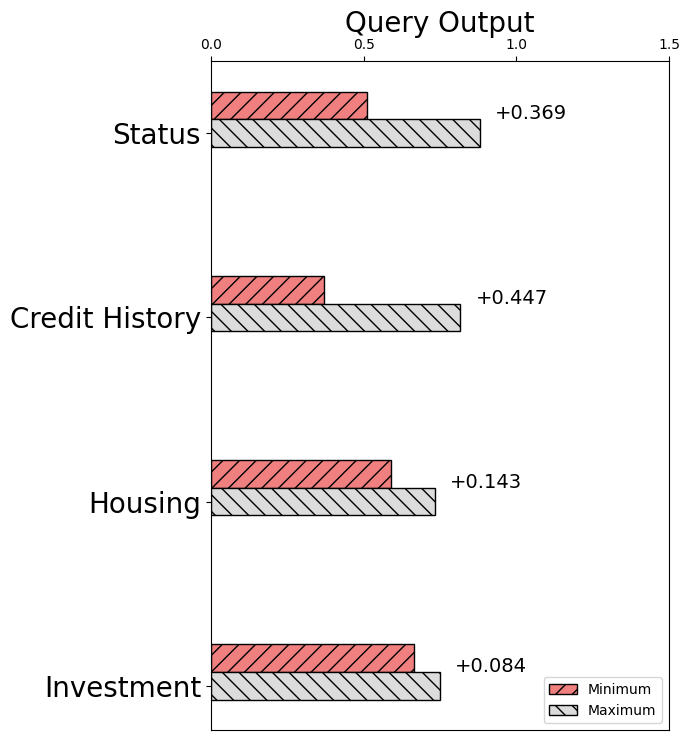

,Feature,Min Query Output,Max Query Output,Gap
0,Status,0.511146,0.880311,0.369
1,Credit History,0.369458,0.816923,0.447
2,Housing,0.589620,0.732318,0.143
3,Investment,0.665539,0.749675,0.084


In [6]:
hyper = [min(scores[col]) for col in scores]
hypermax = [max(scores[col]) for col in scores]
labels = ['Status', 'Credit History', 'Housing', 'Investment']

viz_query_output(hyper, hypermax, labels)